# Kaggle - Titanic

In [1]:
# import warnings
# warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

train_df = pd.read_csv("../titanic/train.csv")
test_df = pd.read_csv("../titanic/test.csv")

In [2]:
# 获取所有特征值
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [3]:
# 预览数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
print(train_df.isnull().sum())
print('_'*40)
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [7]:
round(train_df.describe(percentiles=[.5, .6, .7, .75, .8, .9, .99]), 2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
60%,535.00,0.00,3.00,31.80,0.00,0.00,21.68
70%,624.00,1.00,3.00,36.00,1.00,0.00,27.00
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
80%,713.00,1.00,3.00,41.00,1.00,1.00,39.69
90%,802.00,1.00,3.00,50.00,1.00,2.00,77.96


In [8]:
train_df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(["Parch"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


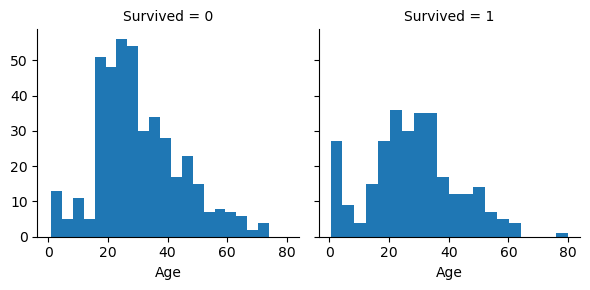

In [13]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(plt.hist, "Age", bins=20)

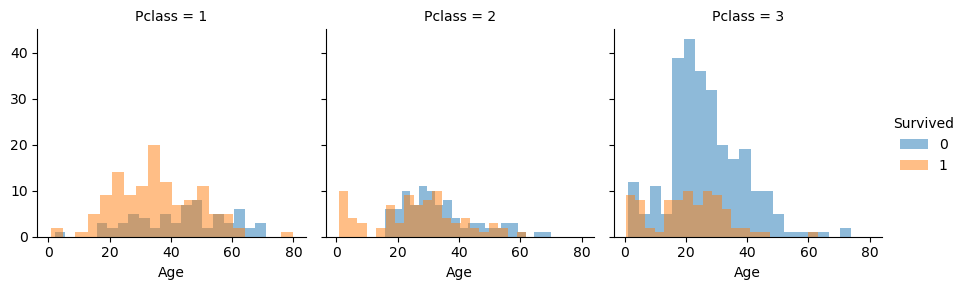

In [14]:
grid = sns.FacetGrid(train_df, col="Pclass", hue="Survived")
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

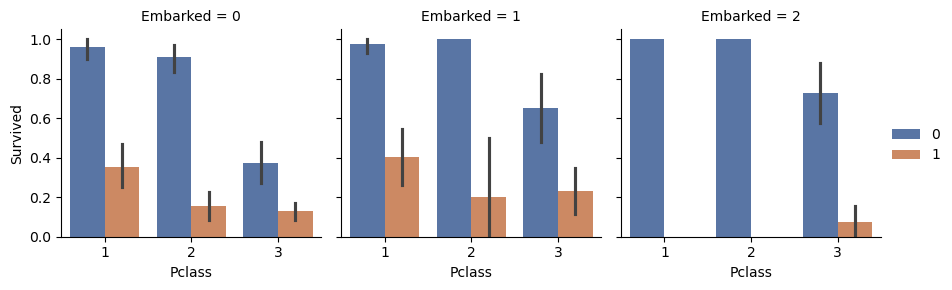

In [58]:
grid = sns.FacetGrid(train_df, col="Embarked")
grid.map(sns.barplot, "Pclass", "Survived", "Sex", palette="deep", order=None, hue_order=None)
grid.add_legend()

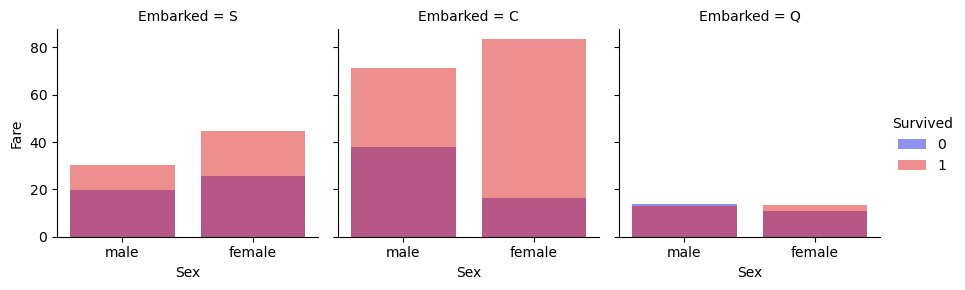

In [16]:
grid = sns.FacetGrid(train_df, col="Embarked", hue="Survived", palette={0:"b", 1:"r"})
grid.map(sns.barplot, "Sex", "Fare", alpha=0.5, errorbar=None, order=None)
grid.add_legend()

In [17]:
combine = [train_df, test_df]

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]


"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [18]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [19]:
for dataset in combine:
    dataset["Title"] = dataset.Name.str.extract("([A-Za-z]+)\.", expand=False)

pd.crosstab(train_df["Title"], train_df["Sex"]).sort_values(by="female", ascending=False)

Sex,female,male
Title,,
Miss,182,0
Mrs,125,0
Mlle,2,0
Mme,1,0
Countess,1,0
Dr,1,6
Ms,1,0
Lady,1,0
Capt,0,1


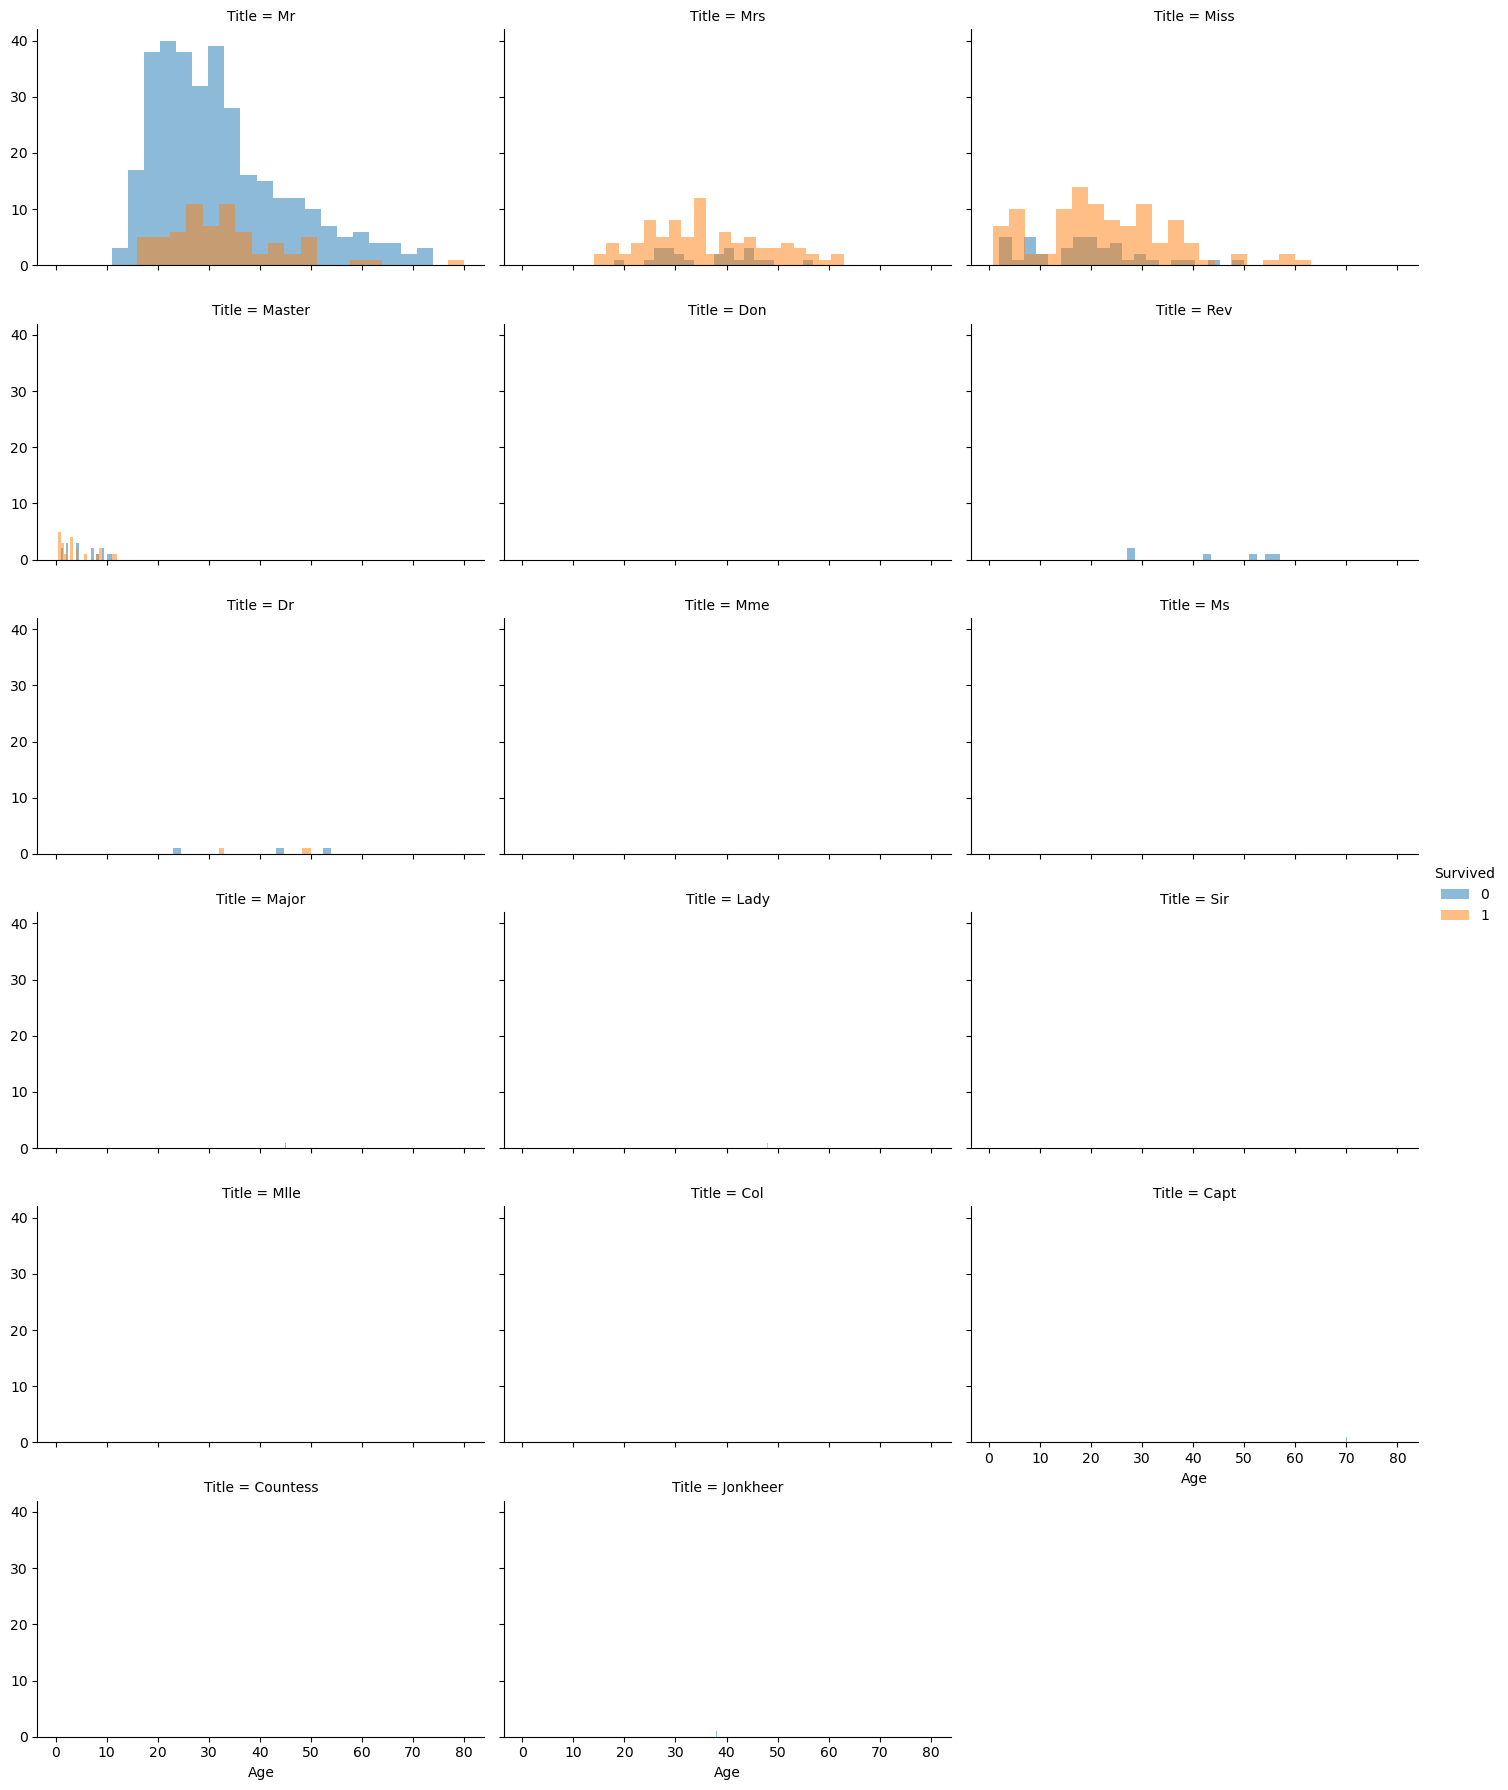

In [20]:
grid = sns.FacetGrid(train_df, col="Title", hue="Survived", col_wrap=3, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.5, bins=20)
grid.add_legend()

In [21]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess", "Capt", "Col", 
                                                 "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace(["Mlle", "Ms"], "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

train_df[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Rare":5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_mapping)
    dataset["Title"] = dataset["Title"].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [23]:
train_df = train_df.drop(["Name", "PassengerId"], axis=1)
test_df = test_df.drop(["Name"], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [24]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map({"female":0, "male":1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1


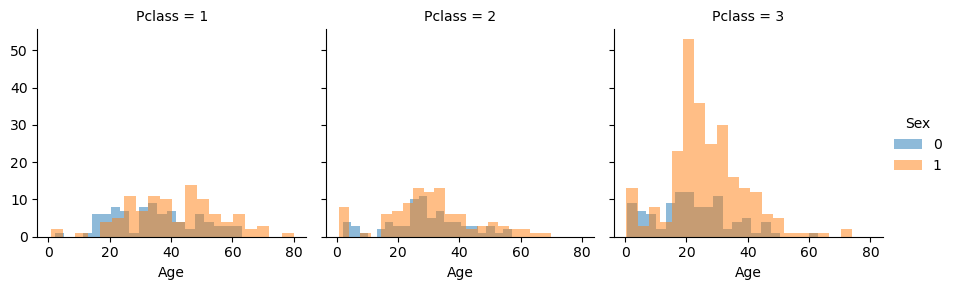

In [25]:
grid = sns.FacetGrid(train_df, col="Pclass", hue="Sex")
grid.map(plt.hist, "Age", alpha=.5, bins=20)
grid.add_legend()

In [26]:
guess_ages = np.zeros((2,3))
guess_ages

for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset["Sex"] == i) & \
                               (dataset["Pclass"] == j+1)]["Age"].dropna()
            age_guess = guess_df.median()
            guess_ages[i, j] = int( age_guess/0.5+0.5)*0.5

    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), "Age"] = guess_ages[i, j]
    dataset["Age"] = dataset["Age"].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,S,1
1,1,1,0,38,1,0,71.2833,C,3
2,1,3,0,26,0,0,7.9250,S,2
3,1,1,0,35,1,0,53.1000,S,3
4,0,3,1,35,0,0,8.0500,S,1


In [27]:
train_df["AgeBand"] = pd.cut(train_df["Age"], 5)
train_df[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)

/tmp/ipykernel_2207/3651969787.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[["AgeBand", "Survived"]].groupby(["AgeBand"], as_index=False).mean().sort_values(by="AgeBand", ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [28]:
for dataset in combine:
    dataset.loc[dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), "Age"] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), "Age"] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), "Age"] = 3
    dataset.loc[dataset["Age"] > 64, "Age"] = 4

train_df.head()   

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [29]:
train_df = train_df.drop(["AgeBand"], axis=1)
combine = [train_df, test_df]
train_df.head()
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,2,0,0,7.8292,Q,1
1,893,3,0,2,1,0,7.0000,S,3
2,894,2,1,3,0,0,9.6875,Q,1
3,895,3,1,1,0,0,8.6625,S,1
4,896,3,0,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,8.0500,S,1
414,1306,1,0,2,0,0,108.9000,C,5
415,1307,3,1,2,0,0,7.2500,S,1
416,1308,3,1,1,0,0,8.0500,S,1


In [30]:
for dataset in combine:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [31]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"]==1, "IsAlone"] = 1

train_df[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
train_df = train_df.drop(["Parch", "SibSp", "FamilySize"], axis=1)
test_df = test_df.drop(["Parch", "SibSp", "FamilySize"], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


In [33]:
for dataset in combine:
    dataset["Age*Pclass"] = dataset.Age * dataset.Pclass

train_df.loc[:, ["Age*Pclass", "Age", "Pclass"]].head(10)
train_df[["Age*Pclass", "Survived"]].groupby(["Age*Pclass"], as_index=False).mean()

,Age*Pclass,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


In [34]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)

train_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [35]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,7.2500,0,1,0,3
1,1,1,0,2,71.2833,1,3,0,2
2,1,3,0,1,7.9250,0,2,1,3
3,1,1,0,2,53.1000,0,3,0,2
4,0,3,1,2,8.0500,0,1,1,6


In [36]:
test_df.fillna({"Fare":test_df["Fare"].dropna().median()}, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,1,2,7.8292,2,1,1,6
1,893,3,0,2,7.0000,0,3,0,6
2,894,2,1,3,9.6875,2,1,1,6
3,895,3,1,1,8.6625,0,1,1,3
4,896,3,0,1,12.2875,0,3,0,3


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

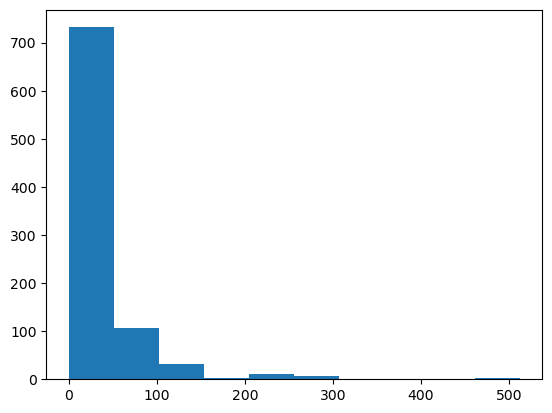

In [37]:
plt.hist(train_df["Fare"])

In [38]:
train_df["FareBand"] = pd.qcut(train_df["Fare"], 4)
train_df[["FareBand", "Survived"]].groupby(["FareBand"], as_index=False, observed=True).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [39]:
for dataset in combine:
    dataset.loc[dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] < 14.454), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] < 31), "Fare"] = 2
    dataset.loc[(dataset["Fare"] > 31), "Fare"] = 3
    dataset["Fare"] = dataset["Fare"].astype(int)

train_df = train_df.drop(["FareBand"], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,0,3,1,1,0,0,1,0,3
1,1,1,0,2,3,1,3,0,2
2,1,3,0,1,1,0,2,1,3
3,1,1,0,2,3,0,3,0,2
4,0,3,1,2,1,0,1,1,6
5,0,3,1,1,1,2,1,1,3
6,0,1,1,3,3,0,1,1,3
7,0,3,1,0,2,0,4,0,0
8,1,3,0,1,1,0,3,0,3
9,1,2,0,0,2,1,3,0,0


In [40]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Pclass
0,892,3,1,2,0,2,1,1,6
1,893,3,0,2,0,0,3,0,6
2,894,2,1,3,1,2,1,1,6
3,895,3,1,1,1,0,1,1,3
4,896,3,0,1,1,0,3,0,3
5,897,3,1,0,1,0,1,1,0
6,898,3,0,1,0,2,2,1,3
7,899,2,1,1,2,0,1,0,2
8,900,3,0,1,0,1,3,1,3
9,901,3,1,1,2,0,1,0,3


In [41]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [42]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.14

In [67]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ["Feature"]
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df['Absolute Correlation'] = coeff_df['Correlation'].abs()
sorted_coeff_df = coeff_df.sort_values(by="Absolute Correlation", ascending=False)
sorted_coeff_df = sorted_coeff_df.drop(columns=["Correlation"])
sorted_coeff_df

,Feature,Absolute Correlation
1,Sex,2.202008
0,Pclass,1.156718
2,Age,0.485253
5,Title,0.402332
4,Embarked,0.285414
6,IsAlone,0.270156
7,Age*Pclass,0.040489
3,Fare,0.005806


In [44]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

81.59

In [45]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.79

In [47]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.99

In [48]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.38

In [49]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.35

In [50]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

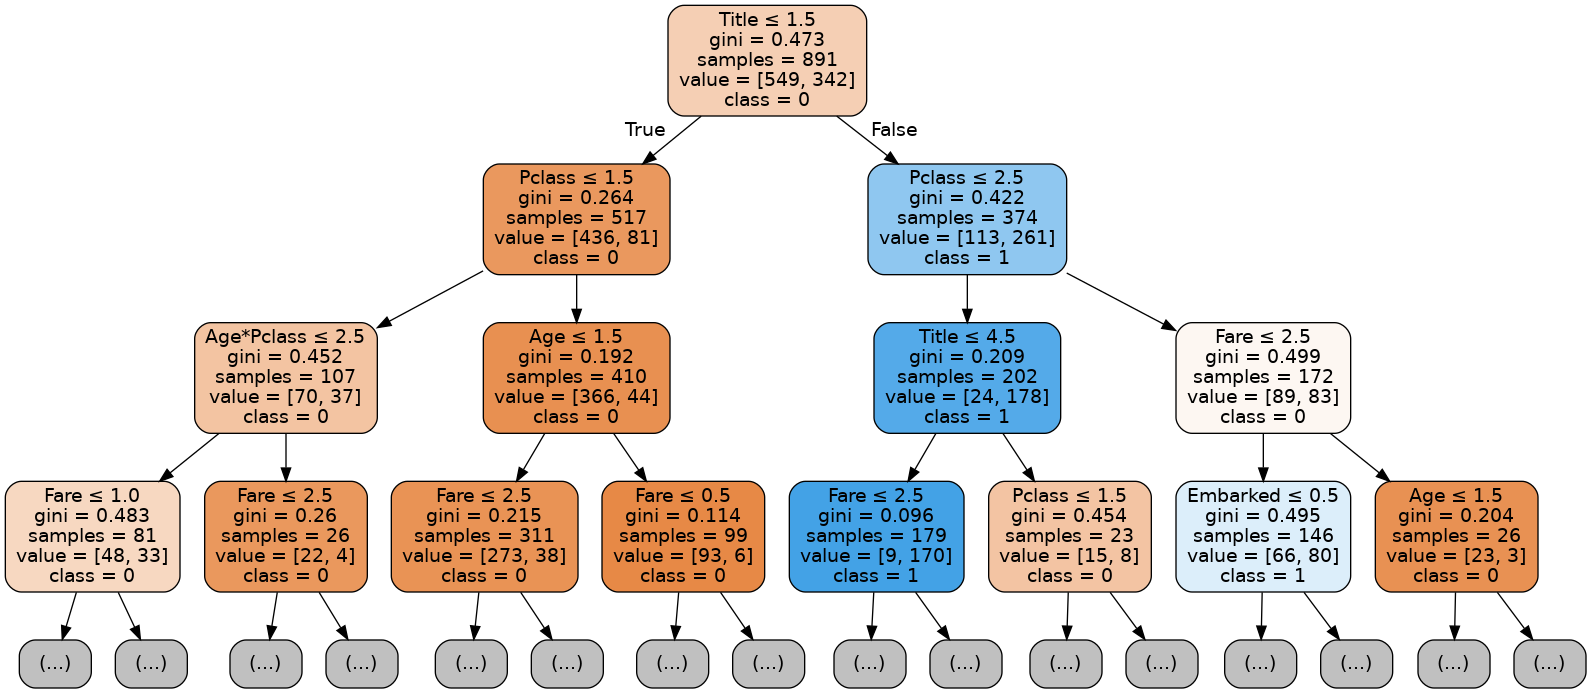

In [51]:
from sklearn import tree
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=X_train.columns,
                                class_names=["0", "1"],
                                max_depth=3,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [52]:
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=X_train.columns,
                                #class_names=["0", "1"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("DTtree.pdf")

# train_df[(train_df["Age*Pclass"]>2.5) & (train_df["Fare"]<=1.5) & (train_df["Fare"]>0.5) & train_df["IsAlone"]>0.5 &\
#          (train_df["Age"]>0.5) & (train_df["Embarked"]<=1.5) & (train_df["Embarked"]>0.5) & (train_df["Fare"]<=2.5) &\
#          (train_df["Age"]<=1.5) & (train_df["Pclass"]>1.5) & (train_df["Title"]<=1.5)]

True

In [53]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.87

In [54]:
models = pd.DataFrame({
    "Model" : ["Support Vector Machines", "KNN", "LogisticRegression",
               "Random Forest", "Naive Bayes", "Perceptron",
               "Stochastic Gradient Decent", "LinearSVC",
               "Decision Tree"],
    "Score": [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by="Score", ascending=False)

,Model,Score
3,Random Forest,86.87
8,Decision Tree,86.87
1,KNN,84.40
0,Support Vector Machines,81.59
2,LogisticRegression,81.14
7,LinearSVC,79.35
4,Naive Bayes,78.79
5,Perceptron,76.99
6,Stochastic Gradient Decent,71.38


In [55]:
submission = pd.DataFrame({
    "PassengerrId" : test_df["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv("./submission.csv", index=False)